In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train = pd.read_csv('/Users/xli/Downloads/train.csv',dtype={'fullVisitorId': np.str})
test = pd.read_csv('/Users/xli/Downloads/test.csv',dtype={'fullVisitorId': np.str})

### How the raw data looks like:

In [4]:
train[:1]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385


In [5]:
train.shape

(903653, 12)

In [6]:
test[:1]

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024


In [7]:
test.shape

(804684, 12)

### Read JSON data:

In [8]:
train_device = pd.DataFrame(list(train.device.apply(json.loads)))
train_geonetwork = pd.DataFrame(list(train.geoNetwork.apply(json.loads)))
train_totals = pd.DataFrame(list(train.totals.apply(json.loads)))
train_trafficSource = pd.DataFrame(list(train.trafficSource.apply(json.loads)))
train_adwordclick = pd.DataFrame(list(train_trafficSource['adwordsClickInfo'].apply(json.dumps).apply(json.loads)))
train_trafficSource = train_trafficSource.drop(['adwordsClickInfo'],axis = 1)
test_device = pd.DataFrame(list(test.device.apply(json.loads)))
test_geonetwork = pd.DataFrame(list(test.geoNetwork.apply(json.loads)))
test_totals = pd.DataFrame(list(test.totals.apply(json.loads)))
test_trafficSource = pd.DataFrame(list(test.trafficSource.apply(json.loads)))
test_adwordclick = pd.DataFrame(list(test_trafficSource['adwordsClickInfo'].apply(json.dumps).apply(json.loads)))
test_trafficSource = test_trafficSource.drop(['adwordsClickInfo'],axis = 1)

In [9]:
train = pd.concat([train[['channelGrouping','date','fullVisitorId','sessionId','socialEngagementType','visitId','visitNumber','visitStartTime']],train_device,train_geonetwork,train_totals,train_trafficSource,train_adwordclick],axis = 1)
test = pd.concat([test[['channelGrouping','date','fullVisitorId','sessionId','socialEngagementType','visitId','visitNumber','visitStartTime']],test_device,test_geonetwork,test_totals,test_trafficSource,test_adwordclick],axis = 1)

In [10]:
print(train.shape)
print(test.shape)

(903653, 56)
(804684, 54)


### Clean Datetime data:

#### Seperate date data for year, month, day, and weekday

In [11]:
def process_date_time(data_df):
    date=data_df['date']
    date = pd.to_datetime(date.astype(str).apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:]))
    data_df["year"] = date.dt.year
    data_df["month"] = date.dt.month
    data_df["day"] = date.dt.day
    data_df["weekday"] = date.dt.weekday_name
    return data_df

In [12]:
process_date_time(train)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,...,criteriaParameters,gclId,isVideoAd,page,slot,targetingCriteria,year,month,day,weekday
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,Not Socially Engaged,1472807194,1,1472807194,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,Not Socially Engaged,1472817241,1,1472817241,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,Not Socially Engaged,1472805784,1,1472805784,Internet Explorer,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2016,9,2,Friday


In [13]:
process_date_time(test) 

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserSize,...,criteriaParameters,gclId,isVideoAd,page,slot,targetingCriteria,year,month,day,weekday
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
5,Organic Search,20171016,4133039884103392367,4133039884103392367_1508186358,Not Socially Engaged,1508186358,1,1508186358,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
6,Organic Search,20171016,4320478850207397557,4320478850207397557_1508203650,Not Socially Engaged,1508203650,1,1508203650,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
7,Organic Search,20171016,5876438247590157131,5876438247590157131_1508184397,Not Socially Engaged,1508184397,1,1508184397,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
8,Organic Search,20171016,0514591268737702944,0514591268737702944_1508189652,Not Socially Engaged,1508189652,6,1508189652,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday
9,Organic Search,20171016,6430567031531677212,6430567031531677212_1508175502,Not Socially Engaged,1508175502,1,1508175502,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,2017,10,16,Monday


### Remove variables with low quality:

In [14]:
train = train.drop(['targetingCriteria'],axis = 1)
test = test.drop(['targetingCriteria'],axis = 1)

In [15]:
lst_train = []
for i in train.columns:
    if train[i].value_counts().shape[0] == 1:
        lst_train.append(i)

In [16]:
print(lst_train)

['socialEngagementType', 'browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion', 'screenColors', 'screenResolution', 'cityId', 'latitude', 'longitude', 'networkLocation', 'bounces', 'newVisits', 'visits', 'campaignCode', 'isTrueDirect', 'criteriaParameters', 'isVideoAd']


In [17]:
lst_test = []
for i in test.columns:
    if test[i].value_counts().shape[0] == 1:
        lst_test.append(i)

In [18]:
print(lst_test)

['socialEngagementType', 'browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion', 'screenColors', 'screenResolution', 'cityId', 'latitude', 'longitude', 'networkLocation', 'bounces', 'newVisits', 'visits', 'isTrueDirect', 'criteriaParameters', 'isVideoAd']


#### - Keep some variables where NaN has a meaning:

In [19]:
train['isTrueDirect'] = train['isTrueDirect'].fillna('FALSE')
train['bounces'] = train['bounces'].fillna(0)
train['newVisits'] = train['newVisits'].fillna(0)
train['pageviews'] = train['pageviews'].fillna(0)
train['transactionRevenue'] = train['transactionRevenue'].fillna(0)

In [20]:
test['isTrueDirect'] = test['isTrueDirect'].fillna('FALSE')
test['bounces'] = test['bounces'].fillna(0)
test['newVisits'] = test['newVisits'].fillna(0)
test['pageviews'] = test['pageviews'].fillna(0)

In [21]:
train.loc[train['adContent'].notnull(), 'adContent'] = 'TRUE'
train['adContent'] = train['adContent'].fillna('FALSE')

In [22]:
test.loc[test['adContent'].notnull(), 'adContent'] = 'TRUE'
test['adContent'] = test['adContent'].fillna('FALSE')

In [23]:
drop_train = ['slot', 'adNetworkType', 'referralPath', 'isVideoAd', 'source', 'metro', 'networkDomain',  'campaignCode', 'keyword','gclId', 'city', 'region', 'subContinent', 'country', 'date', 'socialEngagementType','browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion', 'screenColors', 'screenResolution', 'cityId', 'latitude', 'longitude', 'networkLocation', 'criteriaParameters']

In [24]:
drop_train

['slot',
 'adNetworkType',
 'referralPath',
 'isVideoAd',
 'source',
 'metro',
 'networkDomain',
 'campaignCode',
 'keyword',
 'gclId',
 'city',
 'region',
 'subContinent',
 'country',
 'date',
 'socialEngagementType',
 'browserSize',
 'browserVersion',
 'flashVersion',
 'language',
 'mobileDeviceBranding',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'mobileDeviceModel',
 'mobileInputSelector',
 'operatingSystemVersion',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'criteriaParameters']

##### (there is no 'campaignCode' data for test set)

In [25]:
drop_test = ['slot', 'adNetworkType', 'referralPath', 'isVideoAd', 'source', 'metro', 'networkDomain', 'keyword','gclId', 'city', 'region', 'subContinent', 'country', 'date', 'socialEngagementType','browserSize', 'browserVersion', 'flashVersion', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector', 'operatingSystemVersion', 'screenColors', 'screenResolution', 'cityId', 'latitude', 'longitude', 'networkLocation', 'criteriaParameters']

In [26]:
drop_test

['slot',
 'adNetworkType',
 'referralPath',
 'isVideoAd',
 'source',
 'metro',
 'networkDomain',
 'keyword',
 'gclId',
 'city',
 'region',
 'subContinent',
 'country',
 'date',
 'socialEngagementType',
 'browserSize',
 'browserVersion',
 'flashVersion',
 'language',
 'mobileDeviceBranding',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'mobileDeviceModel',
 'mobileInputSelector',
 'operatingSystemVersion',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'criteriaParameters']

In [27]:
train = train.drop(drop_train, axis=1)

In [28]:
test = test.drop(drop_test, axis=1)

### Convert string type data to dummy variables:

In [29]:
non_numeric = ['adContent', 'campaign', 'browser', 'operatingSystem','isTrueDirect','channelGrouping', 'deviceCategory', 'isMobile', 'continent','year','month', 'weekday', 'medium']

In [30]:
train = pd.get_dummies(train, columns=non_numeric,drop_first=True) 

In [31]:
test = pd.get_dummies(test, columns=non_numeric,drop_first=True) 

### Training data overview:

In [32]:
list(train)

['fullVisitorId',
 'sessionId',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'transactionRevenue',
 'visits',
 'page',
 'day',
 'adContent_TRUE',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_All Products',
 'campaign_Data Share',
 'campaign_Data Share Promo',
 'campaign_Retail (DO NOT EDIT owners nophakun and tianyu)',
 'campaign_test-liyuhz',
 'browser_0',
 'browser_ADM',
 'browser_Amazon Silk',
 'browser_Android Browser',
 'browser_Android Runtime',
 'browser_Android Webview',
 'browser_Apple-iPhone7C2',
 'browser_BlackBerry',
 'browser_CSM Click',
 'browser_Changa 99695759',
 'browser_Chrome',
 'browser_Coc Coc',
 'browser_DASH_JR_3G',
 'browser_DoCoMo',
 'browser_Edge',
 'browser_Firefox',
 'browser_HTC802t_TD',
 'browser_Hisense M20-M_LTE',
 'browser_IE with Chrome Frame',
 'browser_Internet Explorer',
 'browser_Iron',
 'browser_Ko

In [33]:
train.describe()

,visitId,visitNumber,visitStartTime,day,adContent_TRUE,campaign_AW - Accessories,campaign_AW - Apparel,campaign_AW - Dynamic Search Ads Whole Site,campaign_AW - Electronics,campaign_All Products,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,medium_(not set),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
count,9.036530e+05,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,...,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,1.485007e+09,2.264897,1.485007e+09,15.697570,0.012113,0.007824,0.000051,0.015763,0.000106,0.000004,...,0.111060,0.157582,0.162982,0.162378,0.000133,0.018152,0.028026,0.006930,0.422243,0.366241
std,9.022124e+06,9.283735,9.022124e+06,8.823674,0.109391,0.088106,0.007135,0.124556,0.010307,0.002104,...,0.314207,0.364348,0.369349,0.368797,0.011523,0.133501,0.165048,0.082956,0.493917,0.481777
min,1.470035e+09,1.000000,1.470035e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.477561e+09,1.000000,1.477561e+09,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.483949e+09,1.000000,1.483949e+09,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.492759e+09,1.000000,1.492759e+09,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.501657e+09,395.000000,1.501657e+09,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
numeric_train=['visitNumber',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'visits',
 'page',
 'transactionRevenue']

In [35]:
numeric_test=['visitNumber',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'visits',
 'page']

In [36]:
train=train.drop(['visitId','visitStartTime','day'], axis=1)

In [37]:
test=test.drop(['visitId','visitStartTime','day'], axis=1)

In [38]:
for i in numeric_train:
    train[i]=pd.to_numeric(train[i], errors='coerce')

In [39]:
for i in numeric_test:
    test[i]=pd.to_numeric(test[i], errors='coerce')

In [40]:
dummy = [i for i in train.columns if (i not in numeric_train) & (i in test.columns)]

In [41]:
dummy

['fullVisitorId',
 'sessionId',
 'adContent_TRUE',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_Data Share Promo',
 'browser_Amazon Silk',
 'browser_Android Browser',
 'browser_Android Webview',
 'browser_Apple-iPhone7C2',
 'browser_BlackBerry',
 'browser_CSM Click',
 'browser_Chrome',
 'browser_Coc Coc',
 'browser_Edge',
 'browser_Firefox',
 'browser_Internet Explorer',
 'browser_Iron',
 'browser_Konqueror',
 'browser_Lunascape',
 'browser_MQQBrowser',
 'browser_MRCHROME',
 'browser_Maxthon',
 'browser_Mozilla',
 'browser_Mozilla Compatible Agent',
 'browser_Nintendo Browser',
 'browser_Nokia Browser',
 'browser_Opera',
 'browser_Opera Mini',
 'browser_Puffin',
 'browser_Safari',
 'browser_Safari (in-app)',
 'browser_SeaMonkey',
 'browser_Seznam',
 'browser_UC Browser',
 'browser_YE',
 'browser_YaBrowser',
 'browser_no-ua',
 'browser_osee2unifiedRelease',
 'operatingSystem_Android',
 'o

## Data overview

In [42]:
a=pd.to_numeric(train['transactionRevenue'])
b=a[a!=0]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


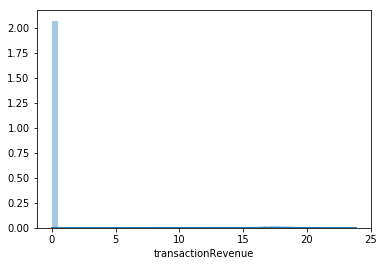

In [43]:
sns.distplot(np.log(1+a))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


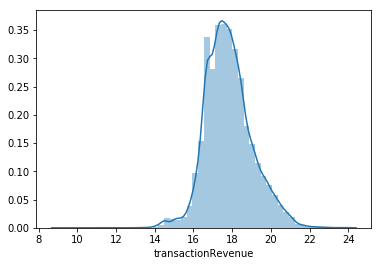

In [44]:
sns.distplot(np.log(1+b))

In [45]:
train[numeric_test+dummy].describe()

,visitNumber,bounces,hits,newVisits,pageviews,visits,page,adContent_TRUE,campaign_AW - Accessories,campaign_AW - Apparel,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,medium_(not set),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
count,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.0,21460.000000,903653.000000,903653.000000,903653.000000,...,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,2.264897,0.498676,4.596538,0.778020,3.849338,1.0,1.008108,0.012113,0.007824,0.000051,...,0.111060,0.157582,0.162982,0.162378,0.000133,0.018152,0.028026,0.006930,0.422243,0.366241
std,9.283735,0.499999,9.641437,0.415578,7.025002,0.0,0.173584,0.109391,0.088106,0.007135,...,0.314207,0.364348,0.369349,0.368797,0.011523,0.133501,0.165048,0.082956,0.493917,0.481777
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,4.000000,1.000000,4.000000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,395.000000,1.000000,500.000000,1.000000,469.000000,1.0,14.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Aggregate session data to user level:

In [46]:
train_1=train.groupby(['fullVisitorId']).sum()

In [47]:
train_1[:4]

,visitNumber,bounces,hits,newVisits,pageviews,transactionRevenue,visits,page,adContent_TRUE,campaign_AW - Accessories,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,medium_(not set),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,1,0,11,1,8,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000020424342248747,1,0,17,1,13,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0000027376579751715,1,0,6,1,5,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000039460501403861,1,0,2,1,2,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
train_1=train_1.reset_index()

In [49]:
list(train_1)

['fullVisitorId',
 'visitNumber',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'transactionRevenue',
 'visits',
 'page',
 'adContent_TRUE',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_All Products',
 'campaign_Data Share',
 'campaign_Data Share Promo',
 'campaign_Retail (DO NOT EDIT owners nophakun and tianyu)',
 'campaign_test-liyuhz',
 'browser_0',
 'browser_ADM',
 'browser_Amazon Silk',
 'browser_Android Browser',
 'browser_Android Runtime',
 'browser_Android Webview',
 'browser_Apple-iPhone7C2',
 'browser_BlackBerry',
 'browser_CSM Click',
 'browser_Changa 99695759',
 'browser_Chrome',
 'browser_Coc Coc',
 'browser_DASH_JR_3G',
 'browser_DoCoMo',
 'browser_Edge',
 'browser_Firefox',
 'browser_HTC802t_TD',
 'browser_Hisense M20-M_LTE',
 'browser_IE with Chrome Frame',
 'browser_Internet Explorer',
 'browser_Iron',
 'browser_Konqueror',
 'browser_LYF_LS_4002_11',
 'browser_LYF_LS

In [50]:
test_1=test.groupby(['fullVisitorId']).sum()

In [51]:
test_1.shape

(617242, 204)

In [52]:
test_1=test_1.reset_index()

In [53]:
list(test_1)

['fullVisitorId',
 'visitNumber',
 'bounces',
 'hits',
 'newVisits',
 'pageviews',
 'visits',
 'page',
 'adContent_TRUE',
 'campaign_"google + redesign/Accessories March 17" All Users',
 'campaign_"google + redesign/Accessories March 17" All Users Similar Audiences',
 'campaign_(direct)',
 'campaign_(not set)',
 'campaign_1000557 | GA | US | en | Hybrid | GDN Remarketing',
 'campaign_1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_Data Share Promo',
 'campaign_Gmail type campaign',
 'campaign_Lifestyles & Hobbies/Shutterbugs',
 'campaign_Media & Entertainment/Movie Lovers',
 'campaign_Media & Entertainment/Music Lovers',
 'campaign_Page: contains "/google+redesign/bags" 1 Day',
 'campaign_Page: contains "/google+redesign/bags" All Users',
 'campaign_Page: contains "/google+redesign/bags" All Users Similar Audiences',
 'campaign_Page: 

In [54]:
dummy = [i for i in train_1.columns if (i not in numeric_train) & (i in test_1.columns) &(i!='fullVisitorId')]

In [55]:
dummy

['adContent_TRUE',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_Data Share Promo',
 'browser_Amazon Silk',
 'browser_Android Browser',
 'browser_Android Webview',
 'browser_Apple-iPhone7C2',
 'browser_BlackBerry',
 'browser_CSM Click',
 'browser_Chrome',
 'browser_Coc Coc',
 'browser_Edge',
 'browser_Firefox',
 'browser_Internet Explorer',
 'browser_Iron',
 'browser_Konqueror',
 'browser_Lunascape',
 'browser_MQQBrowser',
 'browser_MRCHROME',
 'browser_Maxthon',
 'browser_Mozilla',
 'browser_Mozilla Compatible Agent',
 'browser_Nintendo Browser',
 'browser_Nokia Browser',
 'browser_Opera',
 'browser_Opera Mini',
 'browser_Puffin',
 'browser_Safari',
 'browser_Safari (in-app)',
 'browser_SeaMonkey',
 'browser_Seznam',
 'browser_UC Browser',
 'browser_YE',
 'browser_YaBrowser',
 'browser_no-ua',
 'browser_osee2unifiedRelease',
 'operatingSystem_Android',
 'operatingSystem_BlackBerry',
 'op

In [56]:
def force_dummy(col):
    col=col.apply(lambda x:1 if x>=1 else 0)
    return col

In [57]:
train_1[dummy]=train_1[dummy].apply(force_dummy,axis=1)

In [58]:
test_1[dummy]=test_1[dummy].apply(force_dummy,axis=1)

In [59]:
# testing if force_dummy works
train_1['adContent_TRUE'].value_counts()

0    706306
1      7861
Name: adContent_TRUE, dtype: int64

### Select X, y variables

In [60]:
x=[i for i in dummy+numeric_train if i !='transactionRevenue']

In [61]:
x

['adContent_TRUE',
 'campaign_AW - Accessories',
 'campaign_AW - Apparel',
 'campaign_AW - Dynamic Search Ads Whole Site',
 'campaign_AW - Electronics',
 'campaign_Data Share Promo',
 'browser_Amazon Silk',
 'browser_Android Browser',
 'browser_Android Webview',
 'browser_Apple-iPhone7C2',
 'browser_BlackBerry',
 'browser_CSM Click',
 'browser_Chrome',
 'browser_Coc Coc',
 'browser_Edge',
 'browser_Firefox',
 'browser_Internet Explorer',
 'browser_Iron',
 'browser_Konqueror',
 'browser_Lunascape',
 'browser_MQQBrowser',
 'browser_MRCHROME',
 'browser_Maxthon',
 'browser_Mozilla',
 'browser_Mozilla Compatible Agent',
 'browser_Nintendo Browser',
 'browser_Nokia Browser',
 'browser_Opera',
 'browser_Opera Mini',
 'browser_Puffin',
 'browser_Safari',
 'browser_Safari (in-app)',
 'browser_SeaMonkey',
 'browser_Seznam',
 'browser_UC Browser',
 'browser_YE',
 'browser_YaBrowser',
 'browser_no-ua',
 'browser_osee2unifiedRelease',
 'operatingSystem_Android',
 'operatingSystem_BlackBerry',
 'op

In [62]:
y='transactionRevenue'

### Decision Tree Regressor and Parameter Tunning

In [63]:
from sklearn.tree import DecisionTreeRegressor
from math import log
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn import metrics

In [64]:
y_reg=pd.DataFrame(np.log(1+train_1[y]))
x_reg=train_1[x]

In [65]:
k_fold = KFold(n_splits=5)

In [97]:
reg=DecisionTreeRegressor(min_samples_split=20)

In [98]:
[reg.fit(x_reg.iloc[indx_train], y_reg.iloc[indx_train]).score(x_reg.iloc[indx_test], y_reg.iloc[indx_test]) 
 for indx_train, indx_test in k_fold.split(y_reg)] 

[0.17993578025367463,
 0.19135631750515503,
 0.17822734357848546,
 0.13908671315665766,
 0.1591600203270399]

In [93]:
depths = np.logspace(0.8, 1, 10)
leaf =np.arange(10, 50, 5)

In [92]:
leaf

array([10, 15, 20, 25, 30, 35, 40, 45])

In [94]:
clf = GridSearchCV(estimator=reg, param_grid=dict(max_depth=Cs,min_samples_leaf=leaf),n_jobs=-1)
clf.fit(x_reg, y_reg)        
clf.best_score_                                  
clf.best_estimator_.max_depth                          
clf.score(x_reg,y_reg)      

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.39874635831115063

In [95]:
best_depth=clf.best_estimator_.max_depth
best_depth

10.0

In [96]:
best_leaf=clf.best_estimator_.min_samples_leaf
best_leaf

45

In [99]:
best_reg=DecisionTreeRegressor(max_depth=best_depth,min_samples_split=20,min_samples_leaf=best_leaf)

In [100]:
best_reg.fit(x_reg,y_reg)

DecisionTreeRegressor(criterion='mse', max_depth=10.0, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=45,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [101]:
predictions=reg.predict(test_1[x])

## Output

In [103]:
test_1['PredictedLogRevenue']=pd.DataFrame(predictions)

In [104]:
output=pd.concat([test_1['fullVisitorId'],test_1['PredictedLogRevenue']],axis=1)

In [105]:
output.to_csv('submission.csv',index=False)